# OPIM 3511 HW6 - Fall 2022
# DUE: 12/5/2022 11:59PM

Download your HW as a .ipynb file, then submit it to HuskyCT.

When sharing the link, please make sure you change your setting to "anyone with link can view".

## Recall breast cancer dataset.

In [60]:
#import all your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import r2_score
from pylab import *
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
df = pd.read_csv('/content/cars_data.csv')

In [40]:
# now we can directly import it
df.head()
df.shape

(410, 26)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbolizing        205 non-null    float64
 1   normalized losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   numofdoors         203 non-null    object 
 6   body style         205 non-null    object 
 7   drive wheels       205 non-null    object 
 8   engine location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  len                205 non-null    float64
 11  wid                205 non-null    float64
 12  height             205 non-null    float64
 13  curbweight         205 non-null    float64
 14  engine             205 non-null    object 
 15  cylindners         205 non-null    object 
 16  enginesize         205 non

In [42]:
df.drop('normalized losses', axis=1, inplace=True)

In [43]:
df.drop('make', axis=1, inplace=True)
df.drop('fuel type', axis=1, inplace=True)
df.drop('aspiration', axis=1, inplace=True)
df.drop('numofdoors', axis=1, inplace=True)
df.drop('body style', axis=1, inplace=True)
df.drop('drive wheels', axis=1, inplace=True)
df.drop('engine location', axis=1, inplace=True)
df.drop('engine', axis=1, inplace=True)

df.drop('fuel sys', axis=1, inplace=True)


In [44]:
df.isnull().sum().sum()

df.dropna(axis = 0, inplace = True)

In [45]:
df.drop('cylindners', axis=1, inplace=True)

In [46]:
X = df.drop('mpg hwy',  axis = 1)
y = df['mpg hwy']

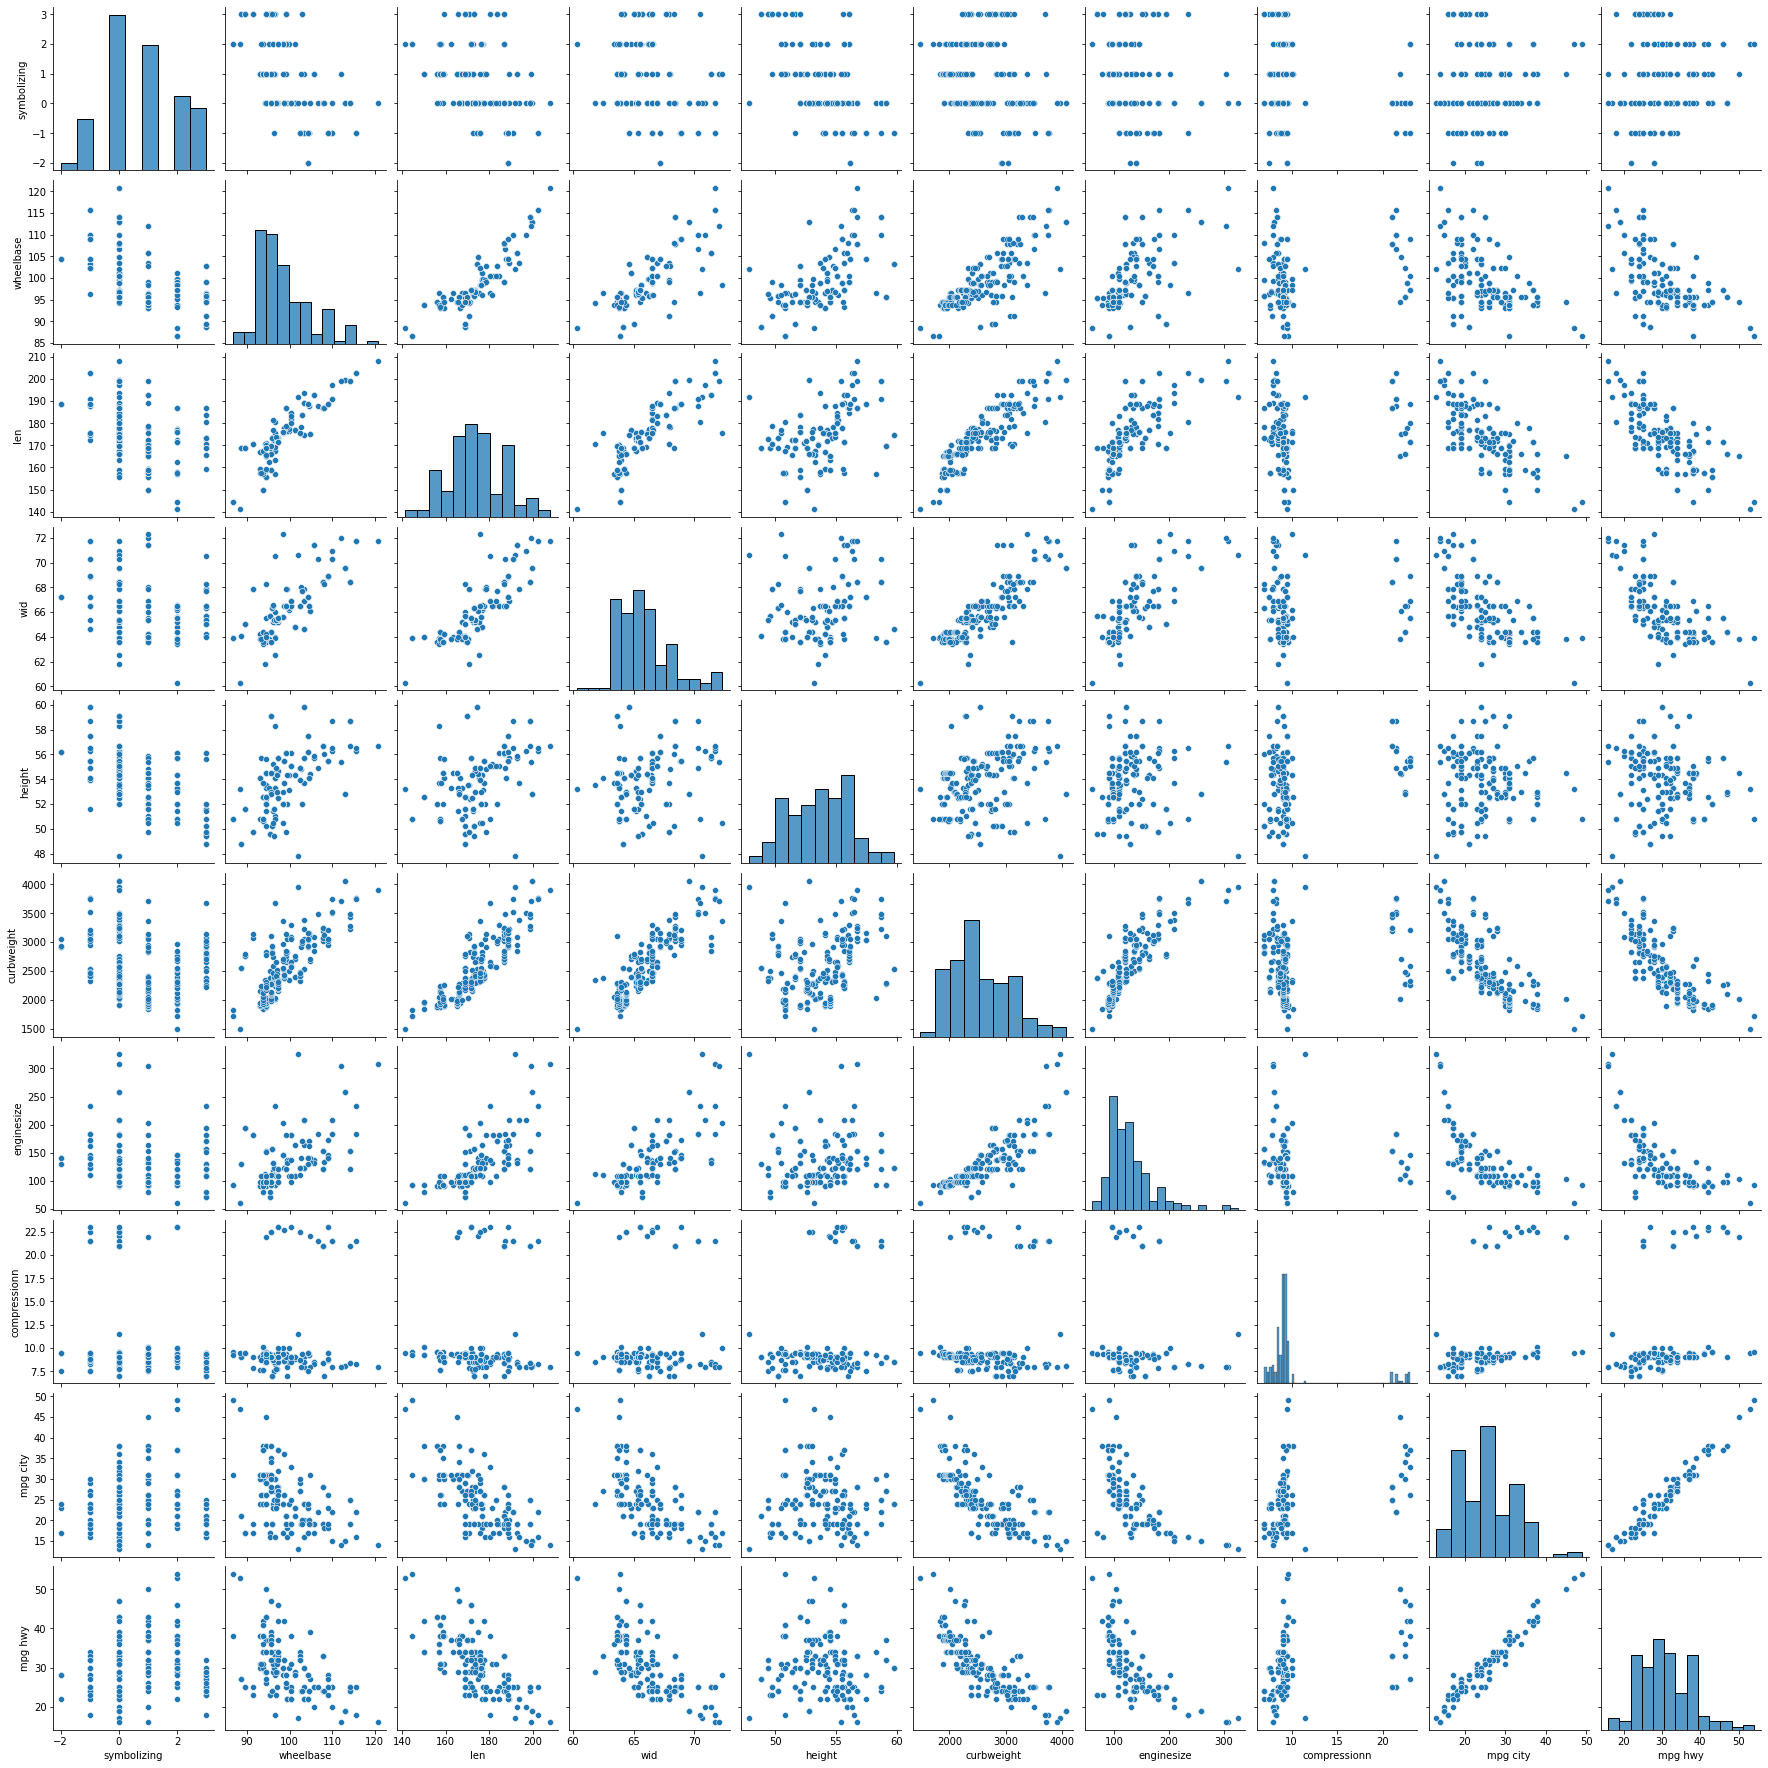

In [11]:
sb.pairplot(df)

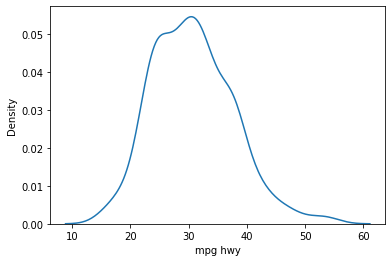

In [ ]:
sns.kdeplot(x=df['mpg hwy'])
show()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 2862916)


In [48]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symbolizing   205 non-null    int64  
 1   wheelbase     205 non-null    float64
 2   len           205 non-null    float64
 3   wid           205 non-null    float64
 4   height        205 non-null    float64
 5   curbweight    205 non-null    int64  
 6   enginesize    205 non-null    int64  
 7   fuel sys      205 non-null    object 
 8   bore          205 non-null    object 
 9   stroke        205 non-null    object 
 10  compressionn  205 non-null    float64
 11  HP            205 non-null    object 
 12  rpm           205 non-null    object 
 13  mpg city      205 non-null    int64  
 14  mpg hwy       205 non-null    int64  
 15  price         205 non-null    object 
dtypes: float64(5), int64(5), object(6)
memory usage: 25.8+ KB


In [52]:
RR = Ridge(alpha=1)
RR = RR.fit(X_train, y_train)

In [53]:
train_preds_RR = RR.predict(X_train)
test_preds_RR = RR.predict(X_test)

In [54]:
alphas = [0.01, 0.05, 0.1, 0.5, 1]

for a in alphas:
  model = Ridge(alpha=a).fit(X_train, y_train) 
  score = model.score(X_train, y_train)
  pred_y = model.predict(X_train)
  mse = mean_squared_error(y_train, pred_y) 
  print("Alpha:{0:.3f}, R2:{1:.5f}, MSE:{2:.5f}, RMSE:{3:.5f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.010, R2:0.95795, MSE:2.05005, RMSE:1.43180
Alpha:0.050, R2:0.95747, MSE:2.07369, RMSE:1.44003
Alpha:0.100, R2:0.95628, MSE:2.13174, RMSE:1.46005
Alpha:0.500, R2:0.94148, MSE:2.85320, RMSE:1.68914
Alpha:1.000, R2:0.92487, MSE:3.66283, RMSE:1.91385


In [55]:
RR_best = RR = Ridge(alpha=0.01)
RR_best = RR_best.fit(X_train, y_train)


train_preds = RR_best.predict(X_train) 
test_preds = RR_best.predict(X_test) 

In [56]:
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

This is train R2: 0.9579510575502712
This is test R2: 0.9690605194658369


In [57]:
trainMAE = mean_absolute_error(y_train, train_preds)
print("trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds)
print("testMAE:", testMAE) # test

trainMAE: 1.0387809095705773
testMAE: 0.8885024420475605


In [58]:
trainMSE = mean_squared_error(y_train, train_preds)
print("trainMSE:", trainMSE)
testMSE = mean_squared_error(y_test, test_preds)

trainMSE: 2.050050090115135


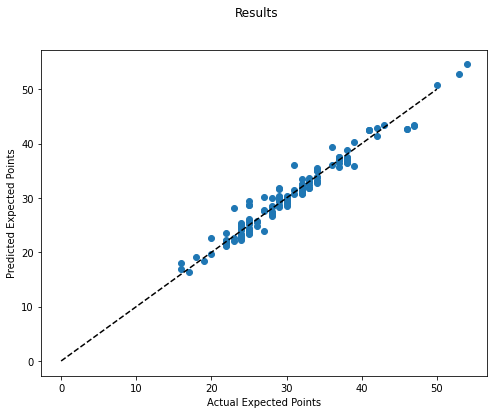

In [59]:
figure(figsize=(8, 6))
scatter(x=y_train, y=train_preds)
plot([0, 50], [0, 50], '--k') # 45 degree line
axis('tight')
xlabel('Actual Expected Points')
ylabel('Predicted Expected Points')
suptitle('Results')
show()

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(156, 14) (39, 14) (156,) (39,)


In [63]:
DTR = DecisionTreeRegressor() 
DTR = DTR.fit(X_train, y_train)

In [64]:
train_preds_DTR = DTR.predict(X_train) 
test_preds_DTR = DTR.predict(X_test) 

In [65]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,5,10], 
           "min_samples_leaf":[2,4,6,8], 
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2"],  
           "max_leaf_nodes":[1, 10] } 

In [73]:
tuning_model = GridSearchCV(DTR, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=0)

In [74]:
tuning_model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.war

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': ['auto', 'log2'],
                         'max_leaf_nodes': [1, 10],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [75]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 8,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [76]:
best_tree = DecisionTreeRegressor(max_depth=5,
                                  max_features='auto',
                                  max_leaf_nodes=10,
                                  min_samples_leaf=8,
                                  min_weight_fraction_leaf=0.1,
                                  splitter='best')

In [77]:
best_tree = best_tree.fit(X_train, y_train)

In [78]:
train_preds_DTR = best_tree.predict(X_train) 
test_preds_DTR = best_tree.predict(X_test) 

In [80]:
print("train R2 (DTR):", r2_score(y_train, train_preds_DTR)) # train
print("test R2 (DTR):", r2_score(y_test, test_preds_DTR))

train R2 (DTR): 0.9041888225033163
test R2 (DTR): 0.9414678216169237


In [81]:
trainMAE_DTR = mean_absolute_error(y_train, train_preds_DTR)
testMAE_DTR = mean_absolute_error(y_test, test_preds_DTR)


In [82]:
trainMSE_DTR = mean_squared_error(y_train, train_preds_DTR)


In [83]:
testMSE_DTR = mean_squared_error(y_test, test_preds_DTR)


In [84]:
print("trainMSE (DTR):", trainMSE_DTR)
print("testMSE (DTR):", testMSE_DTR)


trainMSE (DTR): 4.671168919312035
testMSE (DTR): 2.1367131311912773
